In [1]:
%run ../scripts/notebook_settings.py
import sgkit as sg
import xarray as xr
import glob

Some jobs fail. As far as I can determine, this is due to lacking any data in contigs, which should primarily happen for small contigs/when the species is greatly diverged from the reference. Below is a comprehensive check of the proportion lost contigs relative to the overall number of contigs.

In [2]:
vasili_stats = "~/primatediversity/data/gVCFs_recalling_10_12_2024_metadata/plots/SupTable_Sample_Stats_wGT_QC.tsv"
metadata_path = "/home/eriks/primatediversity/data/gVCFs_recalling_10_12_2024_metadata/"

In [3]:
vasili_table = pd.read_csv(vasili_stats, sep="\t")
sub_vasili = vasili_table.loc[(vasili_table.finalQC != "fail")
                              & (vasili_table.cov_chrA >= 20)
                              & (vasili_table.remove_as_relative != True)
                              & (vasili_table.remove_manual != True)
                              & (~vasili_table.ID.str.startswith("SAMEA11633"))
                             ]

s_l, t_l, f_l, tx_l, fx_l = [], [], [], [], []
for species in sub_vasili.species_genotyping.unique()[:]:
    species_inds = sub_vasili.loc[sub_vasili.species_genotyping == species]
    short_form = species.split("_")[0]
    regions_df = pd.read_csv(metadata_path+"{}_regions_and_batches.txt".format(short_form), sep="\t")
    all_paths_zarr = glob.glob("../zarr_20x_inds/{}/*/".format(species))
    all_paths_fail = glob.glob("../zarr_20x_inds/{}/*temp.bcf".format(species))
    zarr_chr = [x.split("/")[-2] for x in all_paths_zarr]
    fail_chr = [x.split("/")[-1].split("_temp")[0] for x in all_paths_fail]
    print(species)
    passing_df = regions_df.loc[regions_df.CONTIG_ID.isin(zarr_chr)]
    failing_df = regions_df.loc[regions_df.CONTIG_ID.isin(fail_chr)]
    #print("Total pass:", passing_df.END.sum(),
    #     "\n Percentage fail:", failing_df.END.sum()/passing_df.END.sum())
    #print("Total pass chrX:", passing_df.loc[(passing_df.MALE_PLOIDY == 1) &
    #                                   (passing_df.FEMALE_PLOIDY == 2)].END.sum(),
    #     "\n Percentage fail chrX:", failing_df.loc[(failing_df.MALE_PLOIDY == 1) &
    #                                   (failing_df.FEMALE_PLOIDY == 2)].END.sum()/passing_df.END.sum())
    s_l.append(species)
    t_l.append(passing_df.END.sum()), f_l.append(failing_df.END.sum())
    tx_l.append(passing_df.loc[(passing_df.MALE_PLOIDY == 1) & (passing_df.FEMALE_PLOIDY == 2)].END.sum())
    fx_l.append(failing_df.loc[(failing_df.MALE_PLOIDY == 1) & (failing_df.FEMALE_PLOIDY == 2)].END.sum())
    
pass_fail_df = pd.DataFrame({"species": s_l, "total_pass": t_l, "total_fail": f_l,
                         "total_pass_chrx": tx_l, "total_fail_chrx": fx_l})
pass_fail_df["total_fail_proportion"] = pass_fail_df.total_fail/pass_fail_df.total_pass

Allenopithecus_nigroviridis_ssp
Aotus_azarai_ssp
Aotus_griseimembra_ssp
Aotus_nancymaae_ssp
Aotus_trivirgatus_ssp
Aotus_vociferans_ssp
Alouatta_belzebul_ssp
Alouatta_caraya_ssp
Alouatta_discolor_ssp
Alouatta_juara_ssp
Alouatta_macconnelli_ssp
Alouatta_palliata_ssp
Alouatta_seniculus_ssp
Ateles_belzebuth_ssp
Ateles_chamek_ssp
Ateles_geoffroyi_ssp
Ateles_marginatus_ssp
Ateles_paniscus_ssp
Brachyteles_hypoxanthus_ssp
Lagothrix_lagotricha_ssp
Callimico_goeldii_ssp
Callithrix_geoffroyi_ssp
Callithrix_jacchus_ssp
Callithrix_kuhlii_ssp
Cebuella_niveiventris_ssp
Cebuella_pygmaea_ssp
Mico_argentatus_ssp
Mico_humeralifer_ssp
Mico_humilis_ssp
Carlito_syrichta_ssp
Cephalopachus_bancanus_ssp
Tarsius_dentatus_ssp
Tarsius_lariang_ssp
Tarsius_wallacei_ssp
Cercopithecus_ascanius_ssp
Cercopithecus_campbelli_ssp
Cercopithecus_cephus_ssp
Cercopithecus_denti_ssp
Cercopithecus_diana_ssp
Cercopithecus_hamlyni_ssp
Cercopithecus_mitis_ssp
Cercopithecus_mona_ssp
Cercopithecus_neglectus_ssp
Cercopithecus_nictita

In [4]:
pass_fail_df.sort_values("total_pass")[:11].species.to_list()

['Saimiri_macrodon_ssp',
 'Macaca_thibetana_ssp',
 'Saimiri_sciureus_ssp',
 'Saimiri_oerstedii_ssp',
 'Saimiri_ustus_ssp',
 'Macaca_arctoides_ssp',
 'Macaca_leucogenys_ssp',
 'Macaca_assamensis_ssp',
 'Macaca_radiata_ssp',
 'Saimiri_cassiquiarensis_ssp',
 'Saimiri_boliviensis_ssp']

In [5]:
sub_vasili.loc[sub_vasili.species_genotyping.isin(pass_fail_df.sort_values("total_pass")[:11].species)]

,ID,ID_PGDP,group,family,genus,species,subspecies,species_full,species_short,species_genotyping,...,reason,finalQC,Kuderna_AB_QC,Kuderna_COV_QC,relatives,remove_as_relative,generation,founder,remove_manual,pedigree_source
1516,PD_0071,PD_0071,OWM,Cercopithecidae,Macaca,arctoides,ssp,Macaca_arctoides_ssp,M.arctoides_ssp,Macaca_arctoides_ssp,...,NaN,ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1517,PD_0533,PD_0533,OWM,Cercopithecidae,Macaca,arctoides,ssp,Macaca_arctoides_ssp,M.arctoides_ssp,Macaca_arctoides_ssp,...,NaN,ok,NaN,NaN,PD_0536,False,NaN,NaN,NaN,NaN
1519,PD_0535,PD_0535,OWM,Cercopithecidae,Macaca,arctoides,ssp,Macaca_arctoides_ssp,M.arctoides_ssp,Macaca_arctoides_ssp,...,NaN,ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1521,SAMN04316319,SAMN04316319,OWM,Cercopithecidae,Macaca,arctoides,ssp,Macaca_arctoides_ssp,M.arctoides_ssp,Macaca_arctoides_ssp,...,NaN,ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1523,SAMN14521207,SAMN14521207,OWM,Cercopithecidae,Macaca,arctoides,ssp,Macaca_arctoides_ssp,M.arctoides_ssp,Macaca_arctoides_ssp,...,NaN,ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1524,SAMN15194901,SAMN15194901,OWM,Cercopithecidae,Macaca,arctoides,ssp,Macaca_arctoides_ssp,M.arctoides_ssp,Macaca_arctoides_ssp,...,NaN,ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1525,SAMN15194902,SAMN15194902,OWM,Cercopithecidae,Macaca,arctoides,ssp,Macaca_arctoides_ssp,M.arctoides_ssp,Macaca_arctoides_ssp,...,NaN,ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1526,SAMN19736176,SAMN19736176,OWM,Cercopithecidae,Macaca,arctoides,ssp,Macaca_arctoides_ssp,M.arctoides_ssp,Macaca_arctoides_ssp,...,NaN,ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1528,SAMN04316321,SAMN04316321,OWM,Cercopithecidae,Macaca,assamensis,ssp,Macaca_assamensis_ssp,M.assamensis_ssp,Macaca_assamensis_ssp,...,NaN,ok,PASS,FAIL,NaN,NaN,NaN,NaN,NaN,NaN
1530,SAMN19736177,SAMN19736177,OWM,Cercopithecidae,Macaca,assamensis,ssp,Macaca_assamensis_ssp,M.assamensis_ssp,Macaca_assamensis_ssp,...,NaN,ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
pass_fail_df.sort_values("total_pass")[10:20]

,species,total_pass,total_fail,total_pass_chrx,total_fail_chrx,total_fail_proportion
218,Saimiri_boliviensis_ssp,0,0,0,0,NaN
250,Varecia_variegata_ssp,1862770237,0,95448993,0,0.0
249,Varecia_rubra_ssp,1862770237,0,95448993,0,0.0
63,Eulemur_mongoz_ssp,1890777747,0,103121626,0,0.0
64,Eulemur_rubriventer_ssp,1890777747,0,103121626,0,0.0
50,Cheirogaleus_sibreei_ssp,2078483261,0,107312693,0,0.0
49,Cheirogaleus_medius_ssp,2078483261,0,107312693,0,0.0
48,Cheirogaleus_major_ssp,2078483261,0,107312693,0,0.0
62,Eulemur_macaco_ssp,2079190388,0,111878440,0,0.0
61,Eulemur_flavifrons_ssp,2079190388,0,111878440,0,0.0


In [7]:
pass_fail_df.sort_values("total_fail")[-20:]

,species,total_pass,total_fail,total_pass_chrx,total_fail_chrx,total_fail_proportion
212,Saguinus_imperator_ssp,3131198283,16706901,148490209,0,0.005336
214,Saguinus_labiatus_ssp,3129930405,17974779,148490209,0,0.005743
66,Eulemur_collaris_ssp,2301454081,19461830,144850586,0,0.008456
85,Prolemur_simus_ssp,2192284454,22345802,73531725,0,0.010193
56,Erythrocebus_patas_ssp,3006999944,22850367,151995220,0,0.007599
216,Saguinus_mystax_ssp,3122103436,25801748,148490209,0,0.008264
70,Eulemur_sanfordi_ssp,2294903708,26012203,144850586,0,0.011335
213,Saguinus_inustus_ssp,3120169550,27735634,148490209,0,0.008889
65,Eulemur_albifrons_ssp,2290960406,29955505,144850586,0,0.013076
82,Hapalemur_griseus_ssp,2184337450,30292806,73531725,0,0.013868


In [8]:
pass_fail_df.sort_values("total_pass_chrx")[15:]

,species,total_pass,total_fail,total_pass_chrx,total_fail_chrx,total_fail_proportion
218,Saimiri_boliviensis_ssp,0,0,0,0,NaN
84,Lemur_catta_ssp,2214630256,0,73531725,0,0.000000
85,Prolemur_simus_ssp,2192284454,22345802,73531725,0,0.010193
83,Hapalemur_meridionalis_ssp,2182706472,31923784,73531725,0,0.014626
82,Hapalemur_griseus_ssp,2184337450,30292806,73531725,0,0.013868
...,...,...,...,...,...,...
137,Nycticebus_coucang_ssp,2869074404,0,187328519,0,0.000000
134,Loris_lydekkerianus_ssp,2869074404,0,187328519,0,0.000000
133,Arctocebus_calabarensis_ssp,2867982747,1091657,187328519,0,0.000381
139,Xanthonycticebus_pygmaeus_ssp,2869074404,0,187328519,0,0.000000


Checking the distribution of heterozygosity/alternate homozygous.

In [9]:
output_df = pd.read_csv("../results/window_stats_20x_inds/Rhinopithecus_brelichi_ssp_10kb_het_hom.txt",
                        sep="\t")
output_df

,het,alt_hom,variant_count,GVCF_ID,window_start,chrom,window_end,callable_frac,chr_type,species
0,0.0,0,0,SAMN03076574,0,NC_044565.1,10000,0.0000,aut,Rhinopithecus_brelichi_ssp
1,0.0,18,18,SAMN03076574,10000,NC_044565.1,20000,0.5729,aut,Rhinopithecus_brelichi_ssp
2,0.0,18,18,SAMN03076574,20000,NC_044565.1,30000,0.9726,aut,Rhinopithecus_brelichi_ssp
3,0.0,18,18,SAMN03076574,30000,NC_044565.1,40000,0.9544,aut,Rhinopithecus_brelichi_ssp
4,0.0,19,21,SAMN03076574,40000,NC_044565.1,50000,0.9174,aut,Rhinopithecus_brelichi_ssp
...,...,...,...,...,...,...,...,...,...,...
294664,5.0,10,31,SAMN03076574,134980000,NC_044561.1,134990000,0.6858,aut,Rhinopithecus_brelichi_ssp
294665,33.0,16,68,SAMN03076574,134990000,NC_044561.1,135000000,0.8769,aut,Rhinopithecus_brelichi_ssp
294666,9.0,22,55,SAMN03076574,135000000,NC_044561.1,135010000,0.9911,aut,Rhinopithecus_brelichi_ssp
294667,2.0,69,76,SAMN03076574,135010000,NC_044561.1,135020000,0.9901,aut,Rhinopithecus_brelichi_ssp


<Axes: xlabel='alt_hom', ylabel='het'>

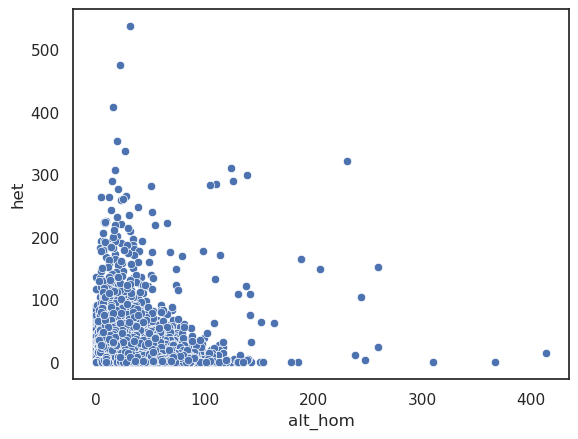

In [10]:
sns.scatterplot(output_df, y="het", x="alt_hom")

<Axes: xlabel='alt_hom', ylabel='het'>

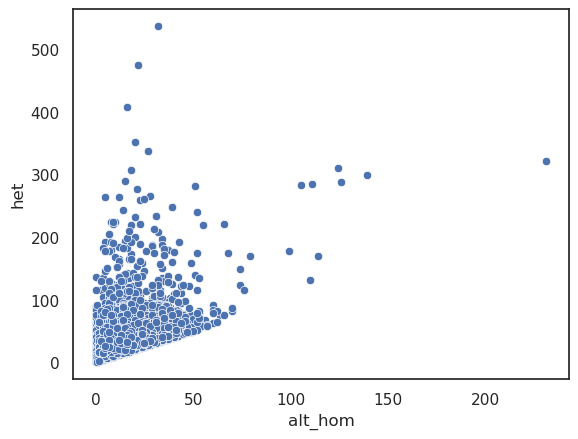

In [11]:
sns.scatterplot(output_df.loc[output_df.het > output_df.alt_hom], y="het", x="alt_hom")

In [12]:
len(output_df.loc[output_df.het > output_df.alt_hom])/(len(output_df))

0.15516732333567496

In [13]:
output_df.loc[(output_df.het > output_df.alt_hom*2+10) & (output_df.callable_frac >= 0.9)]

,het,alt_hom,variant_count,GVCF_ID,window_start,chrom,window_end,callable_frac,chr_type,species
150,51.0,14,73,SAMN03076574,1500000,NC_044565.1,1510000,0.9837,aut,Rhinopithecus_brelichi_ssp
185,65.0,26,112,SAMN03076574,1850000,NC_044565.1,1860000,0.9881,aut,Rhinopithecus_brelichi_ssp
186,60.0,15,84,SAMN03076574,1860000,NC_044565.1,1870000,0.9540,aut,Rhinopithecus_brelichi_ssp
188,23.0,2,91,SAMN03076574,1880000,NC_044565.1,1890000,0.9980,aut,Rhinopithecus_brelichi_ssp
200,23.0,5,33,SAMN03076574,2000000,NC_044565.1,2010000,0.9944,aut,Rhinopithecus_brelichi_ssp
...,...,...,...,...,...,...,...,...,...,...
294625,26.0,7,34,SAMN03076574,134590000,NC_044561.1,134600000,0.9601,aut,Rhinopithecus_brelichi_ssp
294644,76.0,8,88,SAMN03076574,134780000,NC_044561.1,134790000,0.9171,aut,Rhinopithecus_brelichi_ssp
294645,151.0,6,223,SAMN03076574,134790000,NC_044561.1,134800000,0.9824,aut,Rhinopithecus_brelichi_ssp
294654,49.0,7,56,SAMN03076574,134880000,NC_044561.1,134890000,0.9868,aut,Rhinopithecus_brelichi_ssp


In [14]:
from scipy.stats import binomtest
binomtest(115, n=215, p=0.5, alternative='greater')

BinomTestResult(k=115, n=215, alternative='greater', statistic=0.5348837209302325, pvalue=0.16985028376712127)

In [16]:
for df_path in glob.glob("../results/window_stats_20x_inds/*_10kb_het_hom.txt"):
    print(df_path)
    output_df = pd.read_csv(df_path, sep="\t")
    print(len(output_df), len(output_df)/len(output_df.GVCF_ID.unique()), output_df.GVCF_ID.unique())
    print("Percentage well covered:", len(output_df.loc[output_df.callable_frac > 0.9])/(len(output_df)+1))
    chrx_df = output_df.loc[output_df.chr_type == "chrX"]
    print("Percentage well covered chrX:",len(chrx_df.loc[chrx_df.callable_frac > 0.9])/(len(chrx_df)+1))
    print("ChrX percentage (usable):",
          len(chrx_df.loc[chrx_df.callable_frac > 0.9])/(len(output_df.loc[output_df.callable_frac > 0.9])))

../results/window_stats_20x_inds/Propithecus_edwardsi_ssp_10kb_het_hom.txt
260030 260030.0 ['PD_0169']
Percentage well covered: 0.42379947006318475
Percentage well covered chrX: 0.4254309085597429
ChrX percentage (usable): 0.052857959546646585
../results/window_stats_20x_inds/Gorilla_gorilla_ssp_10kb_het_hom.txt
10085011 347759.0 ['SAMEA5204233' 'SAMEA5204234' 'SAMEA5204236' 'SAMEA5204238'
 'SAMN01920484' 'SAMN01920485' 'SAMN01920486' 'SAMN01920487'
 'SAMN01920488' 'SAMN12714420' 'SAMN12714421' 'SAMN35877944' 'PD_0180'
 'PD_0183' 'PD_0184' 'PD_0186' 'PD_0187' 'PD_0188' 'PD_0190' 'PD_0191'
 'PD_0192' 'PD_0193' 'PD_0194' 'PD_0195' 'PD_0196' 'PD_0197' 'PD_0198'
 'PD_0260' 'SAMEA2446072']
Percentage well covered: 0.7783406702936992
Percentage well covered chrX: 0.7897478325720145
ChrX percentage (usable): 0.05180382377389859
../results/window_stats_20x_inds/Mico_argentatus_ssp_10kb_het_hom.txt
1119868 279967.0 ['PD_0117' 'PD_0162' 'PD_0281' 'PD_0283']
Percentage well covered: 0.79002097566

319034 319034.0 ['SAMEA104361543']
Percentage well covered: 0.0845706583917125
Percentage well covered chrX: 0.05295854348628368
ChrX percentage (usable): 0.03191134502057003
../results/window_stats_20x_inds/Eulemur_collaris_ssp_10kb_het_hom.txt
906048 226512.0 ['PD_0150' 'PD_0247' 'PD_0610' 'SAMN25565061']
Percentage well covered: 0.8955851173612023
Percentage well covered chrX: 0.7509536220377306
ChrX percentage (usable): 0.05361799458742686
../results/window_stats_20x_inds/Aotus_griseimembra_ssp_10kb_het_hom.txt
834720 278240.0 ['PD_0802' 'PD_0803' 'PD_0804']
Percentage well covered: 0.8530107664716714
Percentage well covered chrX: 0.8166864467125564
ChrX percentage (usable): 0.04832267361023333
../results/window_stats_20x_inds/Cebus_olivaceus_ssp_10kb_het_hom.txt
517084 258542.0 ['PD_0007' 'PD_0079']
Percentage well covered: 0.860090700755195
Percentage well covered chrX: 0.8573372132572465
ChrX percentage (usable): 0.05100957863021091
../results/window_stats_20x_inds/Prolemur_simu

29522486 314069.0 ['SAMN01920517' 'SAMN01920520' 'SAMN01920521' 'SAMN01920523'
 'SAMN01920525' 'SAMEA4374788' 'SAMEA4374789' 'SAMEA4374790'
 'SAMEA4374791' 'SAMEA4374792' 'SAMEA4374793' 'SAMEA4374794'
 'SAMEA4374795' 'SAMEA4374796' 'SAMEA4374797' 'SAMEA4374798'
 'SAMN01920527' 'SAMN01920528' 'SAMN01920530' 'SAMN01920531'
 'SAMN01920532' 'PD_0257' 'PD_0258' 'PD_0259' 'PD_0427' 'SAMD00026329'
 'SAMD00026330' 'SAMEA2058386' 'SAMEA2058387' 'SAMEA2058388'
 'SAMEA2058389' 'SAMEA2058390' 'SAMEA2464840' 'SAMEA2464844'
 'SAMEA2464846' 'SAMEA4374799' 'SAMN12714418' 'SAMN15033211'
 'SAMN15033212' 'SAMN15033214' 'SAMN15033215' 'SAMN15033217'
 'SAMN15033220' 'SAMN15033221' 'SAMN15033222' 'SAMN15033223'
 'SAMN15033224' 'SAMN15033226' 'SAMN15033227' 'SAMN15033229'
 'SAMN15033230' 'SAMN15033231' 'SAMN15033232' 'SAMN15033233'
 'SAMN15033234' 'SAMN15033235' 'SAMN15033236' 'SAMN15033237'
 'SAMN15033238' 'SAMN15033239' 'SAMN15033240' 'SAMN15033241'
 'SAMN15033242' 'SAMN15033243' 'SAMN15033244' 'SAMN150332

558312 279156.0 ['PD_0593' 'PD_0594']
Percentage well covered: 0.8127806445488462
Percentage well covered chrX: 0.635926528070843
ChrX percentage (usable): 0.04051248826539382
../results/window_stats_20x_inds/Trachypithecus_francoisi_ssp_10kb_het_hom.txt
2512539 279171.0 ['PD_0054' 'SAMN09935337' 'SAMN09935338' 'SAMN09935349' 'SAMN09935370'
 'SAMN09935372' 'SAMN09935374' 'SAMN09935375' 'SAMN09935394']
Percentage well covered: 0.9195220772604615
Percentage well covered chrX: 0.7637436969622433
ChrX percentage (usable): 0.043006731488406884
../results/window_stats_20x_inds/Propithecus_perrieri_ssp_10kb_het_hom.txt
260029 260029.0 ['PD_0170']
Percentage well covered: 0.4565127100719148
Percentage well covered chrX: 0.37350277534326615
ChrX percentage (usable): 0.04308086296511579
../results/window_stats_20x_inds/Chiropotes_sagulatus_ssp_10kb_het_hom.txt
961100 240275.0 ['PD_0081' 'PD_0082' 'PD_0329' 'PD_0330']
Percentage well covered: 0.7021197564043737
Percentage well covered chrX: 0.705

Percentage well covered: 0.8695717298693969
Percentage well covered chrX: 0.8268969735305447
ChrX percentage (usable): 0.05123645636737646
../results/window_stats_20x_inds/Otolemur_crassicaudatus_ssp_10kb_het_hom.txt
472106 236053.0 ['PD_0625' 'SAMN25565066']
Percentage well covered: 0.9881404003753387
Percentage well covered chrX: 0.9718020541549953
ChrX percentage (usable): 0.055776106733432224
../results/window_stats_20x_inds/Hoolock_hoolock_ssp_10kb_het_hom.txt
2760570 276057.0 ['PD_0520' 'PD_0521' 'PD_0522' 'PD_0523' 'PD_0524' 'PD_0527' 'PD_0528'
 'PD_0529' 'PD_0530' 'PD_0537']
Percentage well covered: 0.9453044315831761
Percentage well covered chrX: 0.9283151866070867
ChrX percentage (usable): 0.05087025498356057
../results/window_stats_20x_inds/Miopithecus_talapoin_ssp_10kb_het_hom.txt
259710 259710.0 ['SAMN29758772']
Percentage well covered: 0.9607871826761285
Percentage well covered chrX: 0.9527047220561865
ChrX percentage (usable): 0.05110068249127349
../results/window_stats_

236050 236050.0 ['PD_0622']
Percentage well covered: 0.1568559336753498
Percentage well covered chrX: 0.17060053779504034
ChrX percentage (usable): 0.061686382541997514
../results/window_stats_20x_inds/Hylobates_lar_ssp_10kb_het_hom.txt
566544 283272.0 ['SAMN21971399' 'SAMN21971400']
Percentage well covered: 0.7023837470986418
Percentage well covered chrX: 0.5802045592997531
ChrX percentage (usable): 0.045475106299568774
../results/window_stats_20x_inds/Pithecia_pithecia_ssp_10kb_het_hom.txt
961076 240269.0 ['SAMN07678106' 'SAMN21582257' 'SAMN21971464' 'SAMN21971465']
Percentage well covered: 0.9591988987354811
Percentage well covered chrX: 0.955008210180624
ChrX percentage (usable): 0.05362613140333064
../results/window_stats_20x_inds/Trachypithecus_laotum_ssp_10kb_het_hom.txt
279163 279163.0 ['SAMN12631734']
Percentage well covered: 0.8930736054792165
Percentage well covered chrX: 0.6872362504323763
ChrX percentage (usable): 0.03984533560088884
../results/window_stats_20x_inds/Macaca

240273 240273.0 ['PD_0087']
Percentage well covered: 0.9259928248582868
Percentage well covered chrX: 0.9215610510046368
ChrX percentage (usable): 0.05359743271668195
../results/window_stats_20x_inds/Macaca_sylvanus_ssp_10kb_het_hom.txt
284550 284550.0 ['SAMN15061835']
Percentage well covered: 0.8111621466802085
Percentage well covered chrX: 0.8028435400769582
ChrX percentage (usable): 0.05333229354856878
../results/window_stats_20x_inds/Cercocebus_lunulatus_ssp_10kb_het_hom.txt
280626 280626.0 ['PD_0125']
Percentage well covered: 0.7421203234186304
Percentage well covered chrX: 0.461234071093226
ChrX percentage (usable): 0.03302138202910799
../results/window_stats_20x_inds/Semnopithecus_entellus_ssp_10kb_het_hom.txt
1116644 279161.0 ['PD_0102' 'PD_0582' 'PD_0584' 'PD_0586']
Percentage well covered: 0.843462335836367
Percentage well covered chrX: 0.6523821876351059
ChrX percentage (usable): 0.040053172061733956
../results/window_stats_20x_inds/Piliocolobus_tephrosceles_ssp_10kb_het_hom

245353 245353.0 ['SAMN10707783']
Percentage well covered: 0.5203990968152139
Percentage well covered chrX: 0.4122395473989237
ChrX percentage (usable): 0.04679594617878793
../results/window_stats_20x_inds/Macaca_siberu_ssp_10kb_het_hom.txt
304379 304379.0 ['PD_0044']
Percentage well covered: 0.8229450029568303
Percentage well covered chrX: 0.7599048632409088
ChrX percentage (usable): 0.04846938775510204
../results/window_stats_20x_inds/Allenopithecus_nigroviridis_ssp_10kb_het_hom.txt
761835 253945.0 ['PD_0028' 'PD_0126' 'SAMN15801446']
Percentage well covered: 0.9892483421628802
Percentage well covered chrX: 0.9870470238395243
ChrX percentage (usable): 0.051971418904125946
../results/window_stats_20x_inds/Cheirogaleus_sibreei_ssp_10kb_het_hom.txt
207876 207876.0 ['SAMN11334320']
Percentage well covered: 0.6598132549536505
Percentage well covered chrX: 0.5541069100391134
ChrX percentage (usable): 0.04337999416739574
../results/window_stats_20x_inds/Saguinus_labiatus_ssp_10kb_het_hom.txt

Percentage well covered: 0.9151698995606912
Percentage well covered chrX: 0.8520173153601199
ChrX percentage (usable): 0.04859451553346068
../results/window_stats_20x_inds/Pongo_abelii_ssp_10kb_het_hom.txt
5742738 319041.0 ['PD_0263' 'SAMEA104361527' 'SAMEA104361529' 'SAMEA104361530'
 'SAMEA104361532' 'SAMEA2058382' 'SAMEA2058383' 'SAMEA2058384'
 'SAMEA5204230' 'SAMEA5204232' 'SAMN01920542' 'SAMN01920543'
 'SAMN01920544' 'SAMN01920545' 'SAMN01920546' 'SAMN06275555'
 'SAMN10521808' 'SAMN13178754']
Percentage well covered: 0.8141710775990342
Percentage well covered chrX: 0.8316492678842967
ChrX percentage (usable): 0.052053096391200905
../results/window_stats_20x_inds/Cebus_unicolor_ssp_10kb_het_hom.txt
775635 258545.0 ['PD_0013' 'PD_0077' 'PD_0311']
Percentage well covered: 0.8902423301651806
Percentage well covered chrX: 0.8770091197662115
ChrX percentage (usable): 0.05041534878871085
../results/window_stats_20x_inds/Trachypithecus_auratus_ssp_10kb_het_hom.txt
558334 279167.0 ['PD_0053

In [54]:
female_list = sub_vasili.loc[sub_vasili.gSEX == "F"].ID
female_list

2         SAMN15801446
5              PD_0800
8              PD_0807
9              PD_0808
11             PD_0810
             ...      
3223      SAMN09935393
3224      SAMN33960461
3227      SAMN33960464
3229    SAMEA112483311
3239      SAMN29758785
Name: ID, Length: 746, dtype: object

In [60]:
s_l, ind_t_l, t_l, x_l = [], [], [], []
pt_l, px_l = [], []
het_aut_l, het_x_l = [], []
high_het_aut_l, high_het_x_l, outlier_total_aut, outlier_total_x = [], [], [], []
for df_path in glob.glob("../results/window_stats_20x_inds/*_10kb_het_hom.txt")[:]:
    species = df_path.split("/")[-1].split("_10kb")[0]
    print(species)
    output_df = pd.read_csv(df_path, sep="\t")
    ind_count = len(output_df.GVCF_ID.unique())
    s_l.append(species)
    ind_t_l.append(ind_count)
    t_l.append(len(output_df)/ind_count)
    x_l.append(len(output_df.loc[output_df.chr_type == "chrX"])/ind_count)
    pt_l.append(len(output_df.loc[output_df.callable_frac >= 0.9])/ind_count)
    px_l.append(len(output_df.loc[(output_df.callable_frac >= 0.9) &
                                  (output_df.chr_type == "chrX")])/ind_count)
    het_aut_l.append(output_df.loc[(output_df.callable_frac >= 0.9) &
                                  (output_df.chr_type == "aut")].het.mean())
    female_chrx = output_df.loc[(output_df.chr_type == "chrX") &
                                (output_df.GVCF_ID.isin(female_list))]
    het_x_l.append(female_chrx.loc[(female_chrx.callable_frac >= 0.9) ].het.mean())
    high_het_aut_l.append(output_df.loc[(output_df.callable_frac >= 0.9) &
                                  (output_df.chr_type == "aut") &
                                       (output_df.het >= output_df.alt_hom+15)].het.mean())
    high_het_x_l.append(female_chrx.loc[(female_chrx.callable_frac >= 0.9) &
                                       (female_chrx.het >= female_chrx.alt_hom+15)].het.mean())
    outlier_total_aut.append(len(output_df.loc[(output_df.callable_frac >= 0.9) &
                                  (output_df.chr_type == "aut") &
                                       (output_df.het >= output_df.alt_hom+15)])/ind_count)
    outlier_total_x.append(len(female_chrx.loc[(female_chrx.callable_frac >= 0.9) &
                                       (female_chrx.het >= female_chrx.alt_hom+15)])/ind_count)
    
het_df = pd.DataFrame({"species": s_l, "sample_count": ind_t_l, "total_all": t_l, "total_x": x_l, "total_pass_all": pt_l,
                      "total_pass_x": px_l, "het_aut": het_aut_l, "het_x": het_x_l,
                      "outlier_aut": high_het_aut_l, "outlier_x": high_het_x_l,
                       "outlier_total_aut": outlier_total_aut, "outlier_total_x": outlier_total_x})

Propithecus_edwardsi_ssp
Gorilla_gorilla_ssp
Mico_argentatus_ssp
Semnopithecus_priam_ssp
Cercocebus_chrysogaster_ssp
Macaca_maura_ssp
Brachyteles_hypoxanthus_ssp
Propithecus_coquereli_ssp
Avahi_laniger_ssp
Cacajao_ayresi_ssp
Cercopithecus_mitis_ssp
Plecturocebus_caligatus_ssp
Aotus_azarai_ssp
Cercopithecus_wolfi_ssp
Saguinus_midas_ssp
Cheracebus_lucifer_ssp
Cheracebus_lugens_ssp
Mico_humilis_ssp
Varecia_variegata_ssp
Cheirogaleus_major_ssp
Otolemur_garnettii_ssp
Rhinopithecus_avunculus_ssp
Trachypithecus_cristatus_ssp
Saguinus_bicolor_ssp
Tarsius_lariang_ssp
Alouatta_caraya_ssp
Lagothrix_lagotricha_ssp
Cacajao_calvus_ssp
Macaca_nigrescens_ssp
Piliocolobus_gordonorum_ssp
Pongo_tapanuliensis_ssp
Eulemur_collaris_ssp
Aotus_griseimembra_ssp
Cebus_olivaceus_ssp
Prolemur_simus_ssp
Papio_hamadryas_ssp
Pithecia_hirsuta_ssp
Saguinus_geoffroyi_ssp
Cacajao_hosomi_ssp
Cercopithecus_ascanius_ssp
Mandrillus_leucophaeus_ssp
Trachypithecus_poliocephalus_ssp
Theropithecus_gelada_ssp
Galago_senegalensis

In [57]:
female_chrx

,het,alt_hom,variant_count,GVCF_ID,window_start,chrom,window_end,callable_frac,chr_type,species
241247,4.0,112,117,PD_0169,0,HiC_scaffold_2,10000,0.9666,chrX,Propithecus_edwardsi_ssp
241248,4.0,108,114,PD_0169,10000,HiC_scaffold_2,20000,0.9150,chrX,Propithecus_edwardsi_ssp
241249,4.0,59,63,PD_0169,20000,HiC_scaffold_2,30000,0.4196,chrX,Propithecus_edwardsi_ssp
241250,0.0,104,104,PD_0169,30000,HiC_scaffold_2,40000,0.6147,chrX,Propithecus_edwardsi_ssp
241251,5.0,60,66,PD_0169,40000,HiC_scaffold_2,50000,0.3811,chrX,Propithecus_edwardsi_ssp
...,...,...,...,...,...,...,...,...,...,...
254933,0.0,0,0,PD_0169,136860000,HiC_scaffold_2,136870000,0.0695,chrX,Propithecus_edwardsi_ssp
254934,0.0,0,0,PD_0169,136870000,HiC_scaffold_2,136880000,0.0508,chrX,Propithecus_edwardsi_ssp
254935,1.0,181,182,PD_0169,136880000,HiC_scaffold_2,136890000,0.4156,chrX,Propithecus_edwardsi_ssp
254936,2.0,31,33,PD_0169,136890000,HiC_scaffold_2,136900000,0.1135,chrX,Propithecus_edwardsi_ssp


In [61]:
het_df

,species,sample_count,total_all,total_x,total_pass_all,total_pass_x,het_aut,het_x,outlier_aut,outlier_x,outlier_total_aut,outlier_total_x
0,Propithecus_edwardsi_ssp,1,260030.0,13691.0,110247.0,5828.0,17.779303,5.589396,149.771513,135.500000,337.000000,4.000000
1,Gorilla_gorilla_ssp,29,347759.0,17755.0,270687.0,14022.0,17.863123,9.635890,33.780782,27.642694,94455.758621,2114.482759
2,Mico_argentatus_ssp,4,279967.0,14690.0,221239.0,10705.0,5.704012,1.400467,170.805589,250.000000,205.750000,0.250000
3,Semnopithecus_priam_ssp,1,279158.0,14456.0,225729.0,9182.0,16.807737,9.714223,65.398317,55.443439,9151.000000,221.000000
4,Cercocebus_chrysogaster_ssp,1,280626.0,14909.0,206606.0,10010.0,16.458138,5.005994,96.173009,76.045455,4231.000000,22.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
233,Pongo_abelii_ssp,18,319041.0,16258.0,259778.0,13521.0,24.139954,14.583080,40.744912,33.223661,115906.500000,2594.944444
234,Cebus_unicolor_ssp,3,258545.0,13231.0,230211.0,11605.0,17.650366,9.099397,122.699071,113.000000,466.333333,3.333333
235,Trachypithecus_auratus_ssp,2,279167.0,14454.0,241595.0,9596.0,9.385191,NaN,48.054356,NaN,9585.000000,0.000000
236,Cercopithecus_pogonias_ssp,2,212750.0,12415.0,174495.0,9767.0,33.120259,NaN,98.913028,NaN,12883.500000,0.000000


<Axes: xlabel='total_pass_all', ylabel='total_pass_x'>

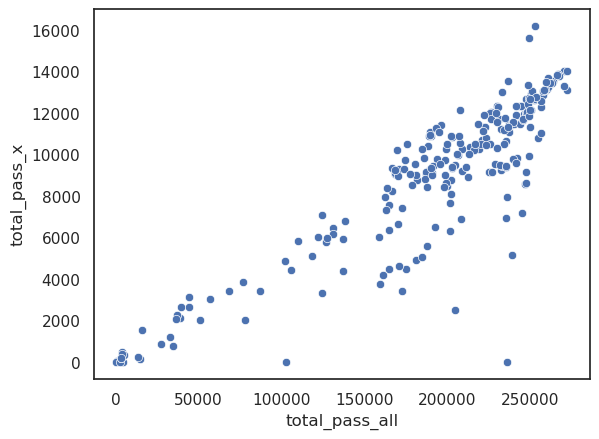

In [62]:
sns.scatterplot(het_df, x="total_pass_all", y="total_pass_x")

<Axes: xlabel='het_aut', ylabel='het_x'>

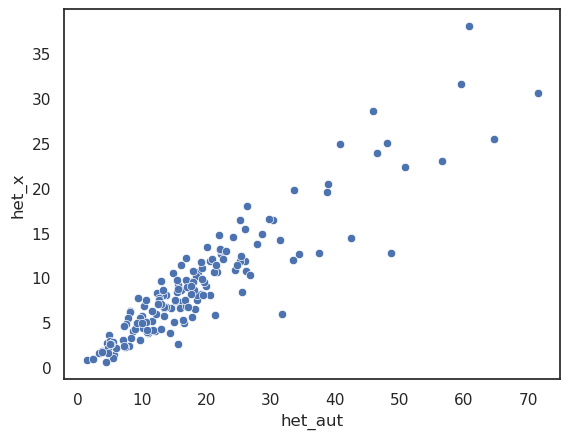

In [63]:
sns.scatterplot(het_df, x="het_aut", y="het_x")

<Axes: xlabel='outlier_aut', ylabel='outlier_x'>

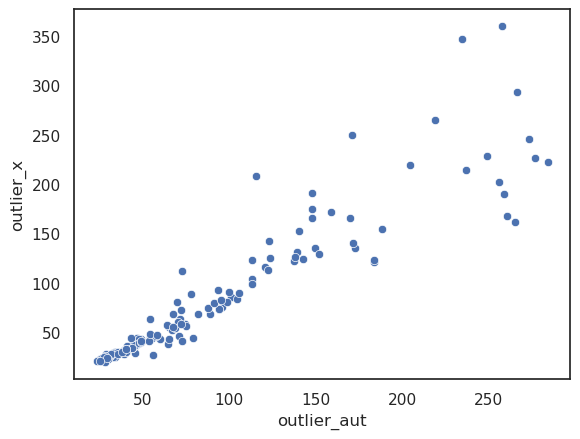

In [64]:
sns.scatterplot(het_df, x="outlier_aut", y="outlier_x")

<Axes: xlabel='outlier_total_aut', ylabel='outlier_total_x'>

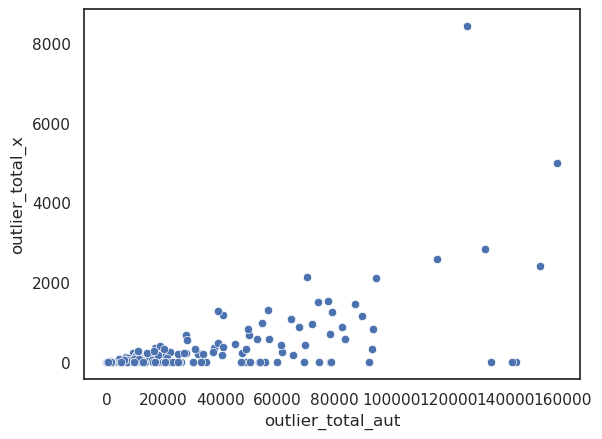

In [65]:
sns.scatterplot(het_df, x="outlier_total_aut", y="outlier_total_x")